<html> <h1 style="font-style:bold; color:blue;"> Neural Computing and Deep Learning </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-5 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> Convolution Neural Networks </h2> </html>

<html> <h2 style="font-style:italic; color:blue;"> Task 1 : </h2> </html>

#### Develop and evaluate an image classifier using Convolution Neural Network.

### The Data = CIFAR 10, Multiple Classes datset.

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

ttps://www.cs.toronto.edu/~kriz/cifar.html

Example of using Keras for CNNs. Use a famous data set, the CIFAR-10 dataset which consists of 10 different image types.

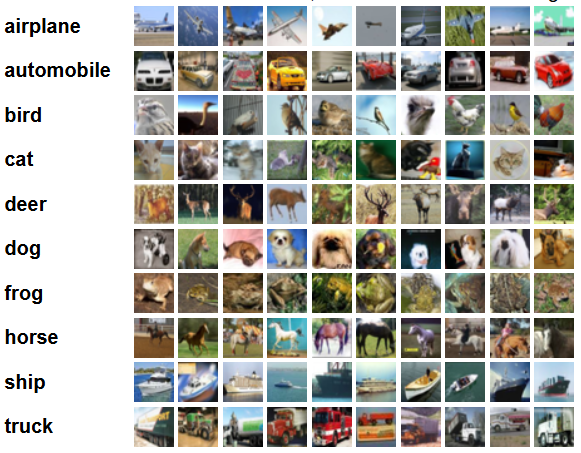

In [1]:
!pip install tensorflow


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Your code to import matplotlib, pandas and numpy libraries
#
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# ...
# ...


##### Following code loads the CIFAR 10 datset.

___________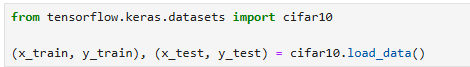

In [3]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 97s 1us/step


In [4]:
# Your code to print shapes of training and test data. Check how the data looks
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
# ...
# ...


(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [5]:
# Your code to print the shape of one image
x_train[0].shape
# ...


(32, 32, 3)

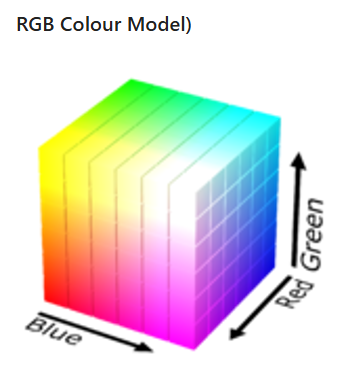

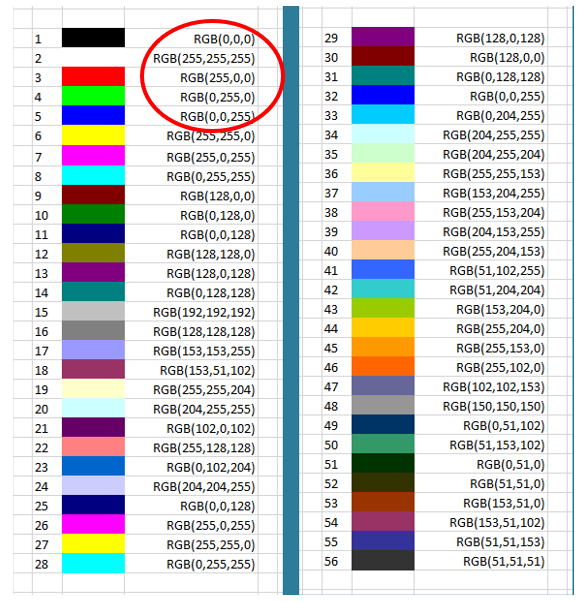

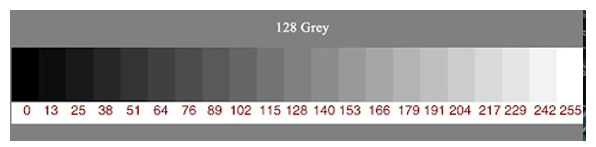

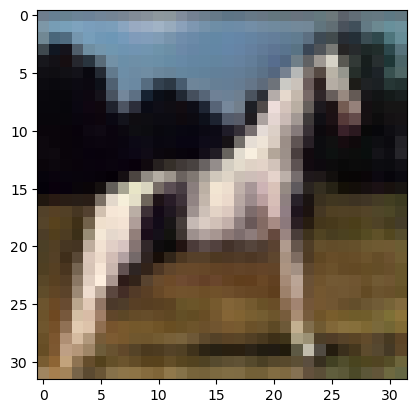

In [6]:
# Your code to show any sample image in the dataset. Use - plt.imshow()
plt.imshow(x_train[68])
# ...


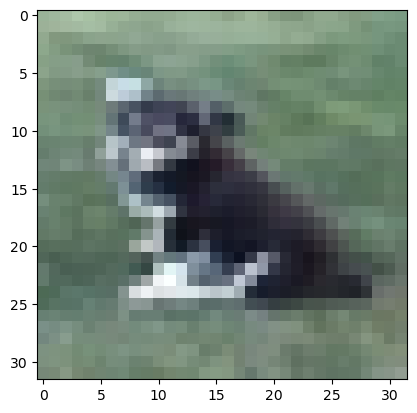

In [7]:
plt.imshow(x_train[70])

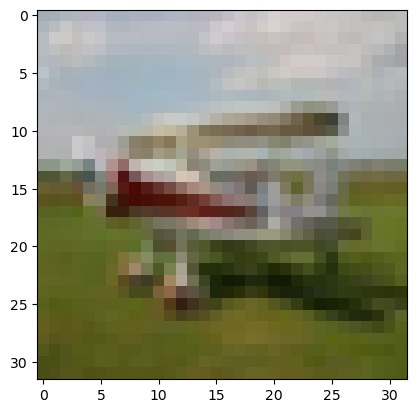

In [8]:
# Show any other image
plt.imshow(x_train[165])
# ...


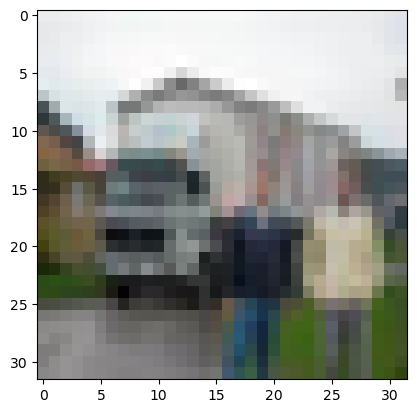

____________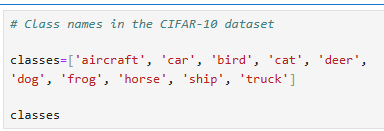

In [9]:
classes=['aircraft', 'car', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck']
classes


['aircraft',
 'car',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

______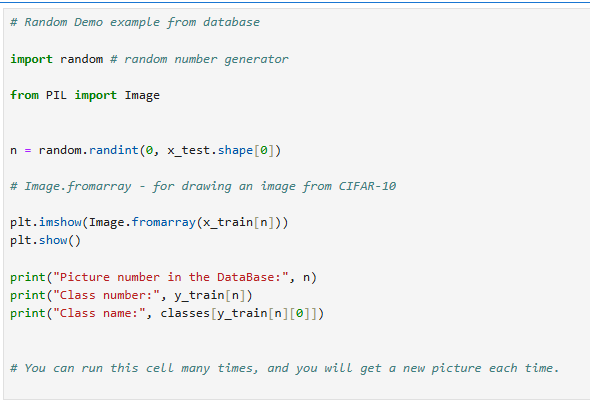

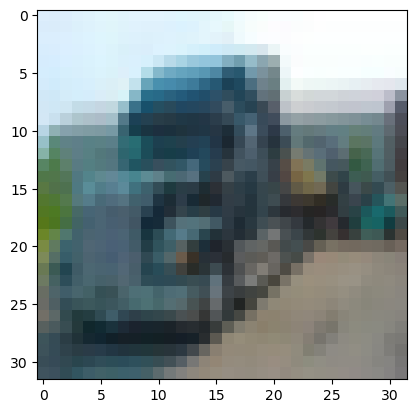

Picture number in the DataBase: 1796
Class number: [9]
Class name: truck


In [10]:
import random # random number generator
from PIL import Image
n = random. randint(0, x_test. shape[0])
# Image.fromarray - for drawing an image from CIFAR-10
plt.imshow(Image. fromarray(x_train[n]))
plt.show()
print ("Picture number in the DataBase:", n)
print("Class number:", y_train[n])
print("Class name:", classes [y_train[n] [0]])


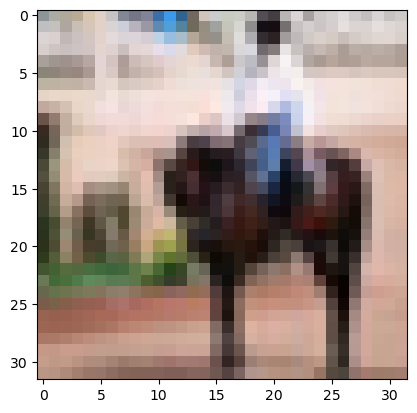

Picture number in the DataBase: 11
Class number: [7]
Class name: horse


In [11]:
import random # random number generator
from PIL import Image
n = random. randint(1, x_test. shape[1])
# Image.fromarray - for drawing an image from CIFAR-10
plt.imshow(Image. fromarray(x_train[n]))
plt.show()
print ("Picture number in the DataBase:", n)
print("Class number:", y_train[n])
print("Class name:", classes [y_train[n] [0]])


## PreProcessing

In [12]:
# Your code to print one image in digitals. Check what pixels look like. 
print(x_train)
# ...


[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

In [13]:
# Your code to print the shape of any image i.e particular value in the x_train
x_train[0].shape
# ...


(32, 32, 3)

In [14]:
# Your code to print the maximum value in x_train. Hint - Use .max()
x_train.max()
# ...


255

____________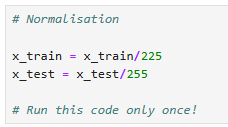

In [15]:
x_train=x_train/255
x_test=x_test/255

__________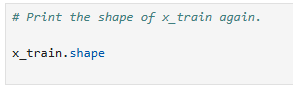

In [16]:
x_train.shape

(50000, 32, 32, 3)

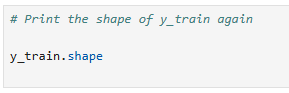

In [17]:
y_train.shape

(50000, 1)

## One hot vector encoding.
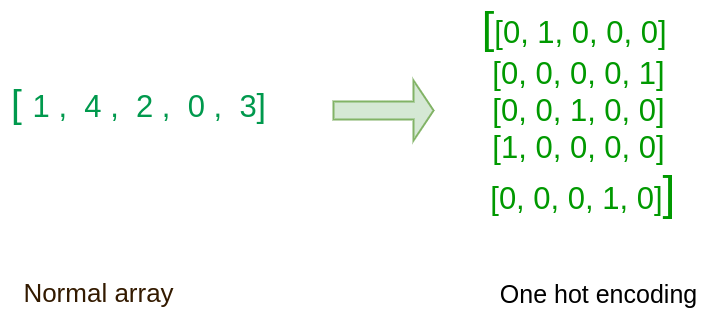


The "to_categorical()" is converting the integer value to binary categorical matrix : https://keras.io/api/utils/python_utils/#to_categorical-functionLinks to an external site.

________________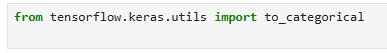

In [18]:
from tensorflow.keras.utils import to_categorical

___________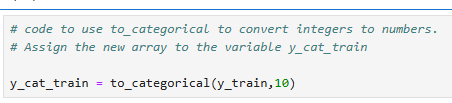

In [19]:
y_cat_train = to_categorical(y_train, 10)

In [20]:
# Your code to print the shape of the array y_cat_train

y_cat_train.shape
# ...


(50000, 10)

In [21]:
# Your code to print any single value in the array y_cat_train and print y_train with the same index.

# Compare the result for better understanding of "to_categorical()"

print(y_train[0])
print(y_cat_train[0])
# ...
# ...


[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [22]:
# Your code to:
# Convert y_test to the encoded vector in the same manner
# Assign it to the variable y_cat_test

y_cat_test =  to_categorical(y_test, 10)


____________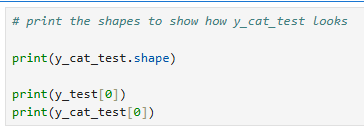

In [23]:
print(y_cat_test.shape)
print(y_test[0])
print(y_cat_test[0])

(10000, 10)
[3]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


-----------------

## Creating a CNN Model

_____________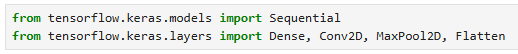

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

#### Please read the following links before creating code for the next cell

https://keras.io/api/layers/convolution_layers/convolution2d/
    
https://keras.io/api/layers/pooling_layers/max_pooling2d/

In [26]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# Add more convolution and pooling layers with your choice of filters, strides, and activation function
# ...
model.add(Conv2D(filters=134, kernel_size=(4,4), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
# ...

model.add(Flatten())

# Add a few dense layers. 
model.add(Dense(56,activation='relu'))
model.add(Dense(10,activation='softmax'))
# ...
# ...




__________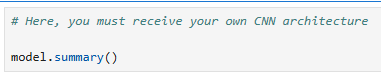

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 29, 29, 32)          │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 134)         │          68,742 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 134)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3350)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 56)                  │         187,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 258,536 (1009.91 KB)

 Trainable params: 258,536 (1009.91 KB)

 Non-trainable params: 0 (0.00 B)

### We could use early stopping in Keras to break from the training.
### What this does is for successive iterations it monitors the loss. If the loss does not decreases for a certain number of iterations denoted by variable 'patience' then the training stops.
### Following code shows how you can use early stopping.


___________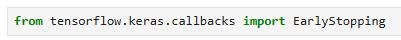

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

__________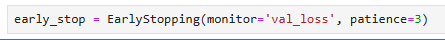

In [29]:
early_stop= EarlyStopping(monitor='val_loss',patience=3)

In [30]:
# Your code to compile the models (model.compile). 

# Use 'categorical cross entropy' as the loss function
# and use 'accuracy' as the metrics
# You can use the optimiser of your choice
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])
# ...


In [68]:
# Your code to fit the model (model.fit). 

# Use additional parameter -  callbacks = [early_stop] to enable early stopping. 
# Use 'history' array to save the training parameters for each epoch




______________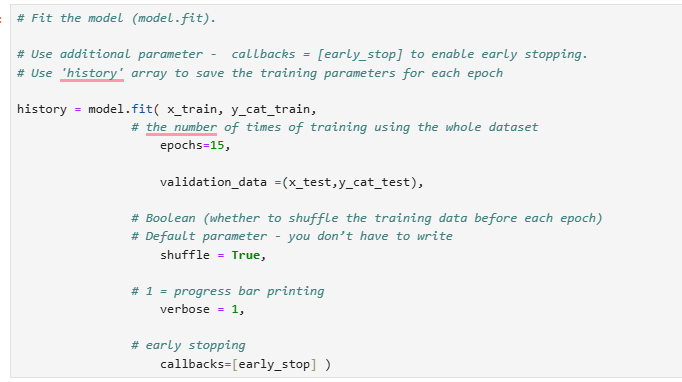

In [31]:
history = model. fit( x_train, y_cat_train,
# the number of times of training using the whole dataset
epochs=15,
validation_data =(x_test, y_cat_test),
# Boolean (whether to shuffle the training data before each epoch)
# Default parameter - you don't have to write
shuffle = True,
# 1 = progress bar printing
verbose = 1,
# early stopping
callbacks=[early_stop] )


Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 31ms/step - accuracy: 0.3628 - loss: 1.7503 - val_accuracy: 0.5154 - val_loss: 1.3833
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.5922 - loss: 1.1649 - val_accuracy: 0.6287 - val_loss: 1.0666
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.6619 - loss: 0.9847 - val_accuracy: 0.6509 - val_loss: 1.0347
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.7033 - loss: 0.8658 - val_accuracy: 0.6578 - val_loss: 1.0232
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.7353 - loss: 0.7757 - val_accuracy: 0.6906 - val_loss: 0.9323
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.7583 - loss: 0.7011 - val_accuracy: 0.6721 - val_loss: 1.0311
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.7797 - loss: 0.6343 - val_accuracy: 0.6514 - val_loss: 1.1195
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.8017 -

##### You can save the model in a file. Following code shows how to do this.

________________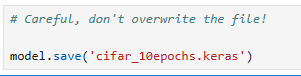

In [32]:
model.save('cifar_10epochs.keras')

##### Yiu can save the loss at every step. Following code shows how to do this. 

___________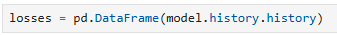

In [33]:
losses=pd.DataFrame(model.history.history)

In [34]:
# You code to print the first few rows of losses.
print(losses.head())
# ...


   accuracy      loss  val_accuracy  val_loss
0   0.45740  1.512870        0.5154  1.383305
1   0.60668  1.130847        0.6287  1.066592
2   0.66472  0.976624        0.6509  1.034715
3   0.70304  0.870319        0.6578  1.023235
4   0.73178  0.785597        0.6906  0.932279


#### Visualise a plot between accuracy vs val_accuracy for all steps.

#### x axis will have the steps (epochs) 
#### y axis will have accuracy and val_accuracy 


_________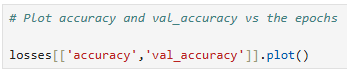

<Axes: >

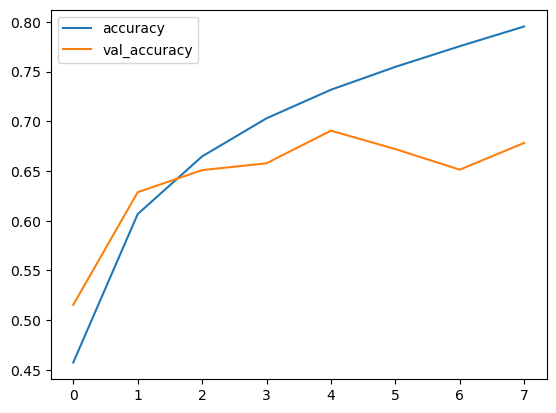

In [35]:
losses[['accuracy','val_accuracy']].plot()

<html> <h4 style="font-style:italic; color:blue;"> Just run the next 3 cells using 'Ctrl' + 'Enter' </h4> </html>

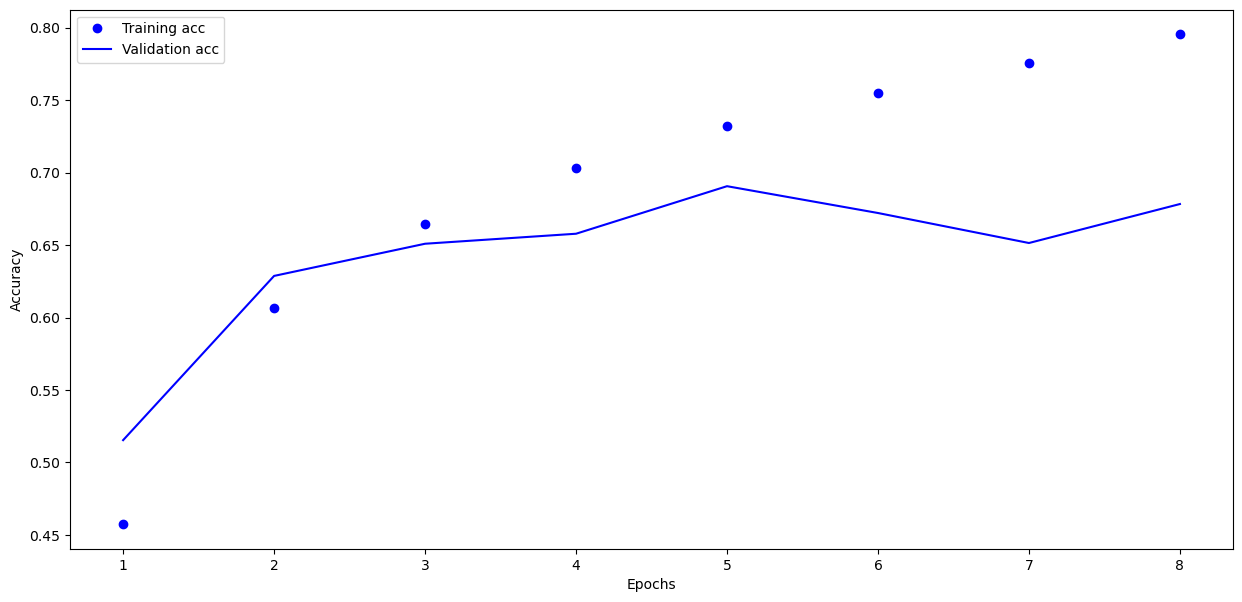

In [36]:
# Plot accuracy and val_accuracy for the neural network training process in more detail

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

__________________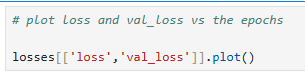

<Axes: >

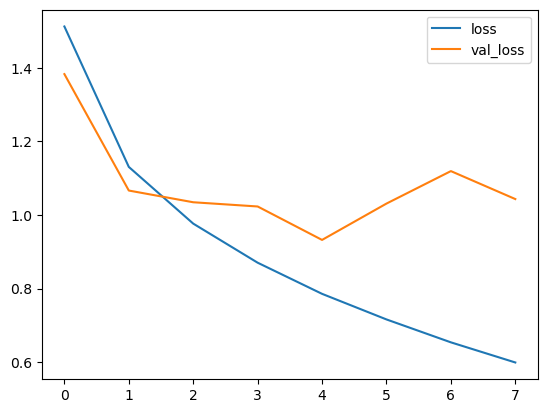

In [37]:
losses[['loss','val_loss']].plot()

_____________________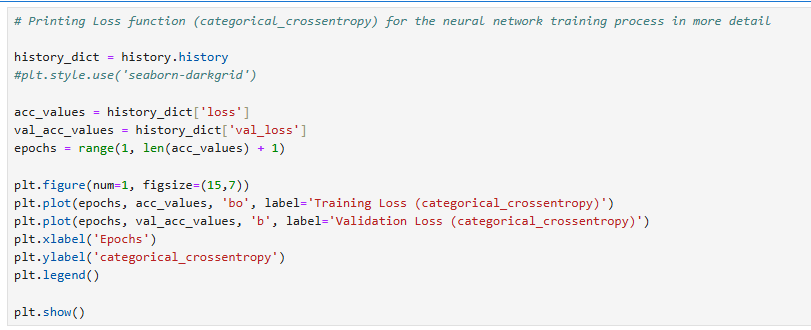

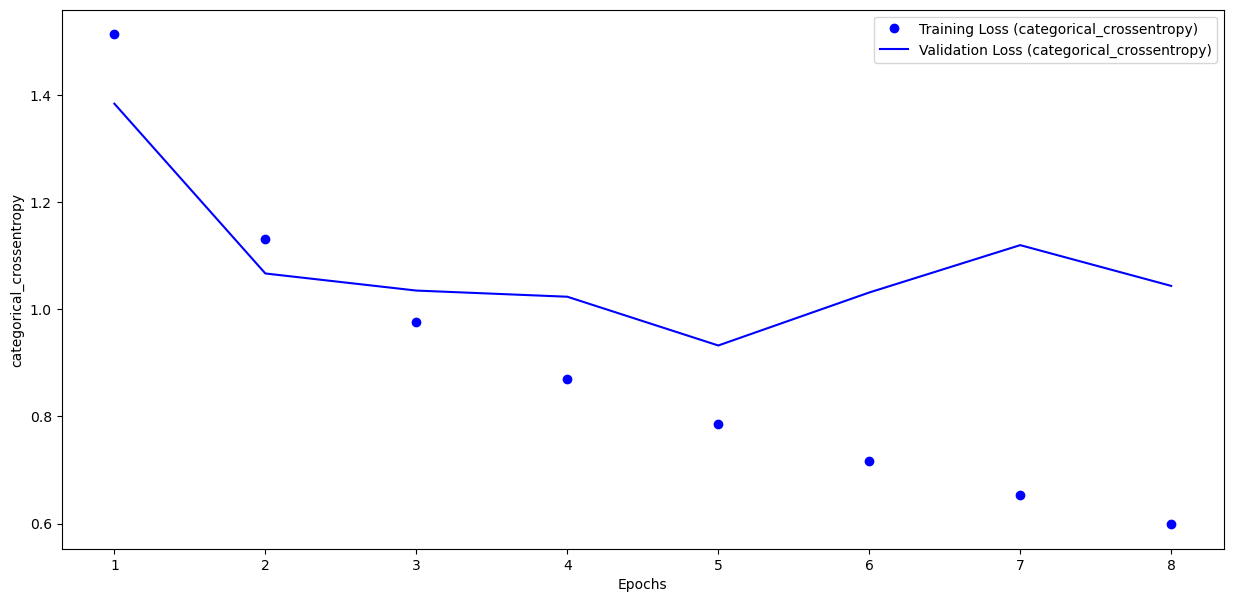

In [38]:
history_dict = history.history
#plt.style.use('seaborn-darkgrid')
acc_values = history_dict ['loss' ]
val_acc_values = history_dict[ 'val_loss' ]
epochs = range(1, len(acc_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training Loss (categorical_crossentropy)')
plt.plot(epochs, val_acc_values, 'b', label='Validation Loss (categorical_crossentropy)')
plt.xlabel('Epochs')
plt.ylabel('categorical_crossentropy')
plt. legend()
plt.show()


__________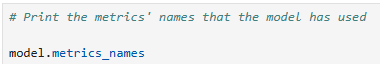

In [39]:
model.metrics_names

['loss', 'compile_metrics']

___________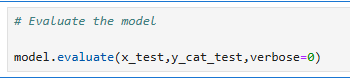

In [40]:
# Evaluate the model

model.evaluate(x_test,y_cat_test,verbose=0)

[1.0434303283691406, 0.6783000230789185]

___________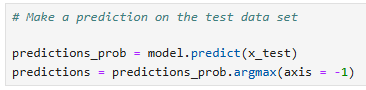

In [41]:
# Make a prediction on the test data set

predictions_prob = model.predict(x_test)
predictions = predictions_prob.argmax(axis = -1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


_______________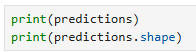

In [42]:
print(predictions)
print(predictions. shape)

[3 8 8 ... 5 1 7]
(10000,)


##### You could get the full classification report. 

_____________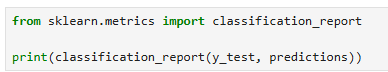

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72      1000
           1       0.73      0.85      0.79      1000
           2       0.56      0.64      0.60      1000
           3       0.43      0.65      0.52      1000
           4       0.74      0.55      0.63      1000
           5       0.68      0.43      0.53      1000
           6       0.75      0.75      0.75      1000
           7       0.86      0.62      0.72      1000
           8       0.71      0.85      0.77      1000
           9       0.74      0.77      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000



##### You could also get and plot confusion matrix.

https://github.com/matplotlib/matplotlib/issues/14751

______________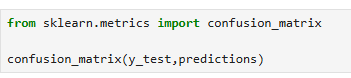

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[673,  47,  56,  43,   8,   3,   7,   0, 117,  46],
       [ 12, 854,   7,   9,   1,   0,   8,   1,  34,  74],
       [ 52,  17, 635, 109,  42,  40,  54,  11,  29,  11],
       [ 16,  27,  74, 653,  30,  66,  60,  12,  35,  27],
       [ 22,  13, 113, 134, 551,  22,  63,  41,  32,   9],
       [ 11,   8,  86, 323,  36, 431,  36,  29,  23,  17],
       [  4,  21,  76,  92,  13,  15, 748,   3,  19,   9],
       [ 27,  17,  54, 102,  60,  51,   7, 622,  16,  44],
       [ 38,  35,  16,  20,   3,   2,   4,   1, 851,  30],
       [ 15, 128,  10,  25,   1,   2,   7,   3,  44, 765]], dtype=int64)

_______________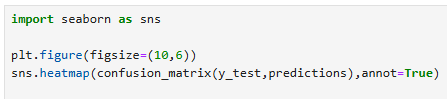

<Axes: >

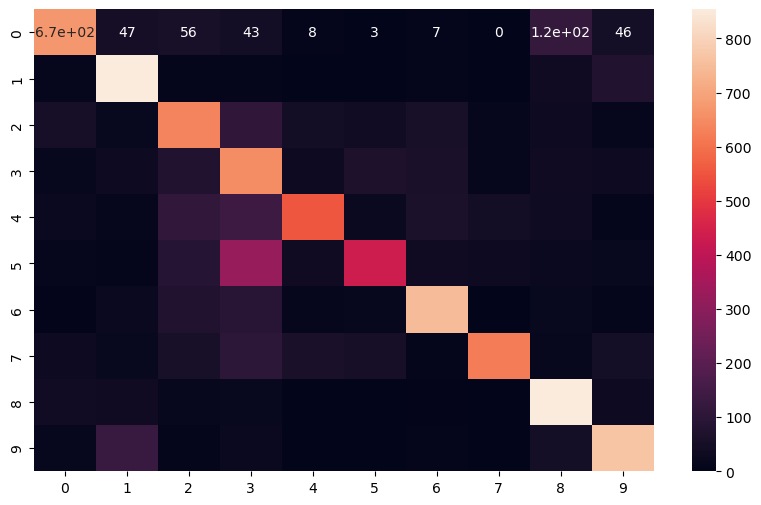

In [45]:
import seaborn as sns
plt. figure(figsize=(10,6))
sns. heatmap(confusion_matrix(y_test, predictions) , annot=True)

### Following code makes a prediction on specific image.

____________________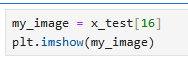

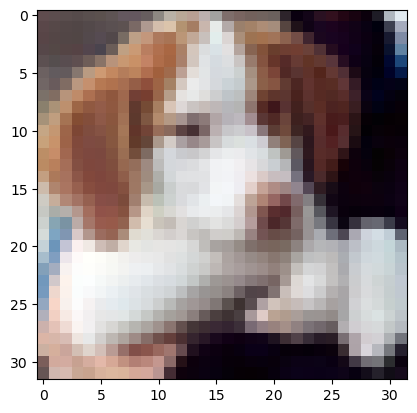

In [46]:
my_image = x_test[16]
plt.imshow(my_image)

______________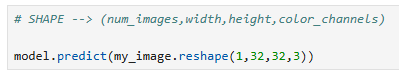

In [47]:
model.predict(my_image.reshape(1,32,32,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


array([[2.3683284e-05, 7.3305666e-03, 4.3663774e-03, 1.6439122e-01,
        1.8067854e-04, 8.1646776e-01, 8.2448358e-04, 5.7853367e-03,
        2.2986223e-04, 3.9999100e-04]], dtype=float32)

In [137]:
# Find the highest probability value in the vector above. 
# What output value does it point to?

_______________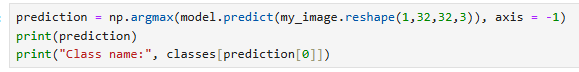

In [48]:
prediction=np.argmax(model.predict(my_image.reshape(1,32,32,3)),axis=-1)
print(prediction)
print('Class name:',classes[predictions[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[5]
Class name: cat


### Let's use a trained neural network
You can run the following code many times

Note the recognition probabilities for each image

<html> <h4 style="font-style:italic; color:blue;"> Just run the next 3 cells using 'Ctrl' + 'Enter' </h4> </html>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


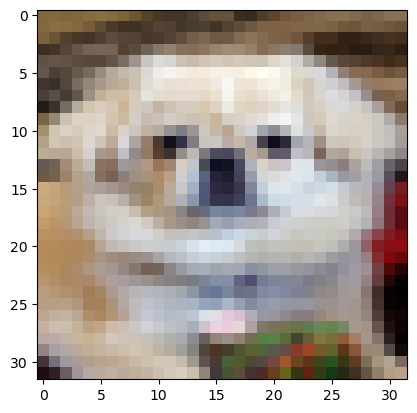

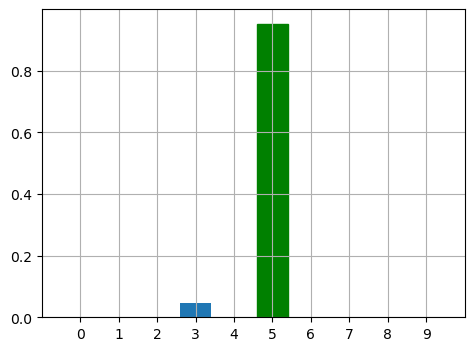

The predicted answer: dog 
 Correct answer: dog
['aircraft', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [49]:
from tensorflow.keras.preprocessing.image import array_to_img

# Class names in the CIFAR-10 dataset
classes=['aircraft', 'car', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck']

# we take a random element 'random.randint()' from the test sample
# and observe: the neural network will guess or not
index = random.randint(0, x_test.shape[0])
plt.imshow(array_to_img(x_test[index]))

# test image conversion
x = x_test[index]
x = np.expand_dims(x, axis=0)

# start recognition
prediction = model.predict(x)
sample = x

# converting the result from one hot encoding format
ans = np.argmax(prediction)

fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1, 2, 2)
bar_list = ax.bar(np.arange(10), prediction[0], align='center')
bar_list[ans].set_color('g')
ax.set_xticks(np.arange(10))
ax.set_xlim([-1, 10])
ax.grid('on')

plt.show()

print('The predicted answer: {}'.format((classes[ans])), "\n",
     'Correct answer: {}'.format(classes[y_test[index][0]]) )

print(classes)


# You can run this cell many times, and each time you will get a new picture,
# which this neural network will recognise with the probability indicated on the graph.

<html> <h2 style="font-style:bold; color:red;"> Lab Logbook requirements </h2> </html>

### 1. Plot of the model's summary

### 2. Please ensure to document in your laboratory logbook a graphical representation depicting the train loss and validation loss trends.

### 3. Based on this analysis, determine the optimal number of epochs for training your model. 

<html> <h2 style="font-style:italic; color:blue;"> Task 2 (Optional): </h2> </html>

#### Evaluate your model for different optimisers available in the Keras. 

https://keras.io/api/optimizers/

- Store the optimisers in an array.
- Use for loop to fit, compile, and  test your model.
- Plot the accuracy vs optimiser


In [3]:
# Create a list containing the names of optimisers (Don't use 'AdamW' and 'Adafactor')
# Create an empty list to store scores

# For every optimiser
   # compile your model
   # fit your model, use epochs=3 for each optimiser (otherwise the training will take a long time)
   # using model.evaluate() find score and append the score in a list

# Plot score vs optimiser 